# Minicurso Python Científico
## Lista 03 - Solução
## Andre Nepomuceno - UFF

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import jn, jn_zeros
from scipy.optimize import curve_fit, newton,minimize_scalar
%matplotlib inline

**Questão 3.1**

In [3]:
alpha, beta = 4.3, 1.6
A = np.array([[alpha,beta], [-beta,alpha]])
print(A)

[[ 4.3  1.6]
 [-1.6  4.3]]


In [4]:
val, vec = np.linalg.eig(A)
print('Autovalores:')
print(val)
print('Autovetores:')
print(f'x1 = {vec[:,0]}')
print(f'x2 = {vec[:,1]}')

Autovalores:
[4.3+1.6j 4.3-1.6j]
Autovetores:
x1 = [0.70710678+0.j         0.        +0.70710678j]
x2 = [0.70710678-0.j         0.        -0.70710678j]


**Questão 3.2**

In [5]:
#Vamos criar um função para realocar o vetor posição ri de cada massa
# em relação ao centro de massa R
#Na função, r é um array 2D e M um array 1D com as massas do sistema
#O array r tem shape (n,3), onde 'n' é o número de partículas do sistema. Cada LINHA
#da matriz r representa as compoentes (x,y,z) de uma dada partícula. 
def realoc(r,M):
    R1 = r*M[:,np.newaxis]       #np.newaxis transforma M num vetor coluna
    R = R1.sum(axis=0)/M.sum()   #coord. do centro de massa (CM)
    return r - R                 #novo vetor posição em relação ao CM

In [6]:
#Função para criar a matriz momento de inércia I
def momento_inercia(r,M):
    Ixx,Iyy,Izz,Ixy,Iyz,Ixz = np.zeros(6)
    x,y,z = [0,1,2]
    rcm = realoc(r,M)
    for i in range(M.size):
        Ixx += M[i]*(rcm[i,y]**2 + rcm[i,z]**2)
        Iyy += M[i]*(rcm[i,x]**2 + rcm[i,z]**2)
        Izz += M[i]*(rcm[i,x]**2 + rcm[i,y]**2)
        Ixy += -M[i]*rcm[i,x]*rcm[i,y]
        Iyz += -M[i]*rcm[i,y]*rcm[i,z]
        Ixz += -M[i]*rcm[i,x]*rcm[i,z]
    return np.array([ [Ixx,Ixy,Ixz],[Ixy,Iyy,Iyz],[Ixz,Iyz,Izz]])    

In [7]:
#Importar o arquivo dados_moleculas.dat 
#Nesse arquivo, a primeira coluna são as massas, e as demais x,y,z.
data = np.loadtxt('../pcientifico_dados/dados_moleculas.dat')
data[:7]

array([[14.0031,  0.    ,  0.    ,  0.    ],
       [ 1.0079,  0.    , -0.9377, -0.3816],
       [ 1.0079,  0.8121,  0.4689, -0.3816],
       [ 1.0079, -0.8121,  0.4689, -0.3816],
       [12.    ,  0.    ,  0.    ,  0.    ],
       [ 1.0079,  0.6276,  0.6276,  0.6276],
       [ 1.0079,  0.6276, -0.6276, -0.6276]])

In [8]:
#Dados do NH3
data_NH3 = data[:4].copy()
data_NH3

array([[14.0031,  0.    ,  0.    ,  0.    ],
       [ 1.0079,  0.    , -0.9377, -0.3816],
       [ 1.0079,  0.8121,  0.4689, -0.3816],
       [ 1.0079, -0.8121,  0.4689, -0.3816]])

In [9]:
M1 = data_NH3[:,0]
r1 = data_NH3[:,1:]
r1

array([[ 0.    ,  0.    ,  0.    ],
       [ 0.    , -0.9377, -0.3816],
       [ 0.8121,  0.4689, -0.3816],
       [-0.8121,  0.4689, -0.3816]])

In [10]:
#A unidade de I é (unidade atomica) x angstrom^2
I = momento_inercia(r1,M1)
I

array([[1.69155099e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.69154808e+00, 3.16312946e-05],
       [0.00000000e+00, 3.16312946e-05, 2.65886895e+00]])

In [11]:
I_principal_NH3 = np.linalg.eigvals(I)
I_principal_NH3

array([2.65886896, 1.69154808, 1.69155099])

In [12]:
#Dados do CH4
data_CH4 = data[4:9].copy()
data_CH4

array([[12.    ,  0.    ,  0.    ,  0.    ],
       [ 1.0079,  0.6276,  0.6276,  0.6276],
       [ 1.0079,  0.6276, -0.6276, -0.6276],
       [ 1.0079, -0.6276,  0.6276, -0.6276],
       [ 1.0079, -0.6276, -0.6276,  0.6276]])

In [13]:
M2 = data_CH4[:,0]
r2 = data_CH4[:,1:]
I_principal_CH4 = np.linalg.eigvals(momento_inercia(r2,M2))
I_principal_CH4

array([3.17594741, 3.17594741, 3.17594741])

O espectro rotacional de uma molécula é determinado por sua simetria, e existe uma classificação baseada nos seus momentos principais de inércia. Quando I_a = I_b = I_c, a molécula é 'spherical top' (é o caso do CH4). Quando I_a = I_b, ou I_b = I_c, a molécula é 'Symmetric top' (caso do NH3 acima). 
Para mais detalhes da física envolvida nesta questão, veja capítulo 11 do livro Classical Dynamics of Particle and Systems, de Thornton & Marion, 5 edição. 

**Questão 3.3**

In [14]:
#Vamos montar um eq. matricial do tipo Mx = b, onde x = (fin_1,fin_2,fin_3)
M = np.array([ [1/6,1/3,1/2],[1/3,1/3,1/2],[1/2,1/3,0]])
b = np.array([4/3,3/2,7/6])
print(M)

[[0.16666667 0.33333333 0.5       ]
 [0.33333333 0.33333333 0.5       ]
 [0.5        0.33333333 0.        ]]


In [15]:
#resolver para fin_i
fin1, fin2, fin3 = np.linalg.solve(M,b)
print('fin1 = {:.2f} L/s'.format(fin1))
print('fin2 = {:.2f} L/s'.format(fin2))
print('fin3 = {:.2f} L/s'.format(fin3))

fin1 = 1.00 L/s
fin2 = 2.00 L/s
fin3 = 1.00 L/s


**Questão 3.4**

In [16]:
#função que retorna z(r,theta,t)
#como t=0, cos(k*nu*t) =1, e o valor de nu é irrelevante
def z(r,theta,n,m):
    k = jn_zeros(n,m)[-1] #ultimo elemento do array, já que k é o m-ésino zero da função
    return jn(n,k*r)*np.sin(n*theta)

In [17]:
#criar arrays r e theta, calcular x e y
r = np.linspace(0,1,100)
theta = np.linspace(0,2*np.pi,100)
x = np.array([rr*np.cos(theta) for rr in r])
y = np.array([rr*np.sin(theta) for rr in r])

(-0.9, 0.9)

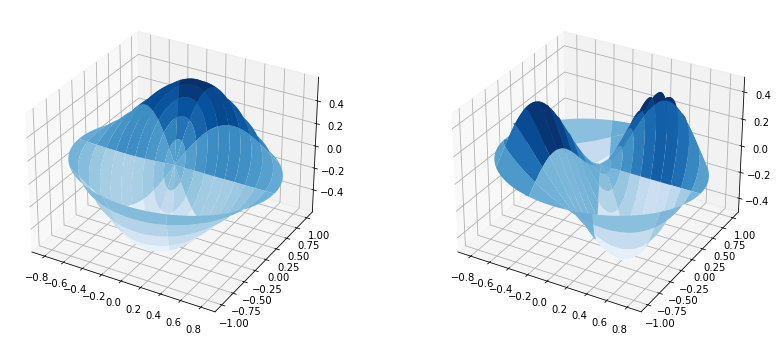

In [18]:
Z1 = np.array([z(rr,theta,n=1,m=1) for rr in r ])
Z2 = np.array([z(rr,theta,n=2,m=1) for rr in r ])
fig, ax = plt.subplots(figsize=(14,6),ncols=2, subplot_kw={'projection':'3d'})
ax[0].plot_surface(x,y,Z1,rstride=10,cstride=10, cmap='Blues')
ax[1].plot_surface(x,y,Z2,rstride=10,cstride=10, cmap='Blues')
ax[0].set_xlim(-0.9,0.9)
ax[1].set_xlim(-0.9,0.9)

**Questão 3.5**

In [19]:
#Vamos implementar o método e Newton
x0 = 1.
f = lambda x: x**3 - 5*x
fprime = lambda x: 3*x**2 - 5
x = x0
for i in np.arange(10):
    x -= f(x)/fprime(x)
    print(f'{x:5}')

 -1.0
  1.0
 -1.0
  1.0
 -1.0
  1.0
 -1.0
  1.0
 -1.0
  1.0


Vemos que o valor de x oscila sempre entre -1 e 1, e a convergência nunca é alcançada. No cado do item (b), o ponto inicial escolhido faz o algoritmo divergir para grande valores. 

In [20]:
#Vamos escolher outros pontos iniciais
#a) x0 = 2
xsol = newton(f,2,fprime=fprime)
print(f'x = {xsol}')

x = 2.23606797749979


In [21]:
np.isclose(f(xsol),0,atol=1e-10)

True

In [22]:
#b) x0 = 1.1
f2 = lambda x: 2 - x**5
xsol = newton(f2,1.1)
print(f'x = {xsol}')

x = 1.1486983549970238


In [23]:
np.isclose(f2(xsol),0,atol=1e-10)

True

**Questão 3.6**

In [24]:
#Como queremos minimizar uma função escalar, vamos utilizar o método minimize_scalar
#Primeiro, definimos as constantes (no SI)
Tar = 293      #K
q = 75         #W/m
h = 12         #W/m2K
rw = 6e-3      #m
k = 0.17       #W/mK

In [25]:
def T(r):
    T = Tar + q/(2*np.pi)*( (1/k)*np.log( (rw + r)/rw ) + (1/h)*(1/(rw + r)) )
    return T

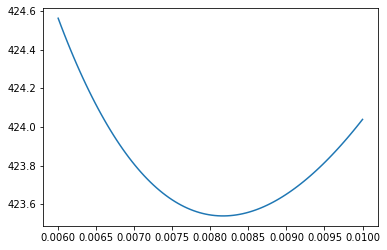

In [26]:
r = np.linspace(6e-3,10e-3,100)
plt.plot(r,T(r))

In [27]:
ri = minimize_scalar(T,(0.006,0.01))
ri

     fun: 423.5397492398695
    nfev: 18
     nit: 14
 success: True
       x: 0.008166666548902435

In [40]:
print("Espessura que minimiza a temperatura do fio:")
print(f'ri = {ri.x*1000:.2f} mm')

Espessura que minimiza a temperatura do fio:
ri = 8.17 mm


**Questão 3.7**

In [29]:
#importar o arquivo higgs_data.csv com numpy
data_set = np.loadtxt('../pcientifico_dados/higgs_data.csv',delimiter=',')
data_m = data_set[:,0] 
data_ev = data_set[:,1] 

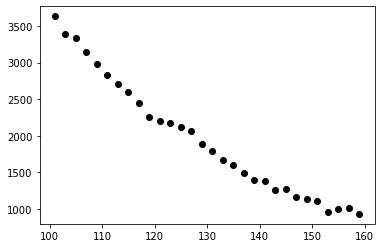

In [30]:
#plot os dados
plt.plot(data_m,data_ev,'ok')

In [31]:
#Vamos definir as funções bkg, sig, e f_H
def f_bkg(x,par_b):
    a,b,c,d = par_b
    return a*x**3 + b*x**2 + c*x + d     

In [32]:
def f_sig(x,par_s):
    A,mu,sigma = par_s
    return A*np.exp( -0.5*( (x-mu)**2/sigma**2) )

In [33]:
def f_H (x,*parms):
    par_b = parms[:4]
    par_s = parms[4:]
    return f_bkg(x,par_b) + f_sig(x,par_s)

In [34]:
#pontos iniciais e erros
#os pontos iniciais se referem aos seguintes parametros, nesta ordem:
#[a,b,c,d,A,mu,sigma]
p0 = [ 5.,5.,100.,100.,250,115.,10.]
delta_y = np.sqrt(data_ev)

In [35]:
popt, pcov = curve_fit(f_H,data_m,data_ev,p0=p0,sigma=delta_y,absolute_sigma=True)

In [36]:
popt

array([-2.78780966e-03,  1.69660531e+00, -3.43772741e+02,  2.39059598e+04,
        1.40563723e+02,  1.27033557e+02,  3.00333702e+00])

In [37]:
#Erro nos parâmetros ajustados
err = np.sqrt(np.diag(pcov))

In [38]:
print('Massa do Higgs: {:.2f} +/- {:.2f} GeV'.format(popt[5],err[5]))

Massa do Higgs: 127.03 +/- 0.85 GeV


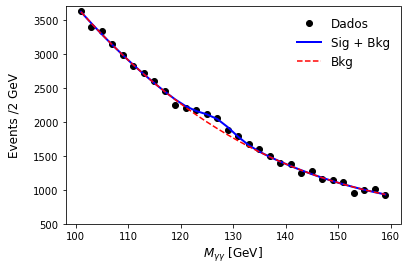

In [39]:
#plt.errorbar(data_m,data_ev, yerr= delta_y,c='k',marker='o',lw=0,label='Dados')
plt.plot(data_m,data_ev,'ok',label='Dados')
plt.plot(data_m,f_H(data_m,*popt),'b',lw=2,label='Sig + Bkg')
plt.plot(data_m,f_bkg(data_m,popt[:4]),'r',ls='--',label='Bkg')
plt.ylim(500,3700)
plt.xlabel('$M_{\gamma \gamma}$ [GeV]',fontsize=12)
plt.ylabel('Events /2 GeV',fontsize=12,labelpad=13)
plt.legend(frameon=False, fontsize=12)